In [ ]:
## https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [41]:
df = pd.read_excel('Desktop/testoutput3.xlsx', sheet_name = 'Sheet4')
df = pd.DataFrame({'Date' : df['Date'], 'Glucose' : df['Glucose']})

In [8]:
df['Date'].min(), df['Date'].max()

(Timestamp('2016-01-05 00:00:00'), Timestamp('2018-04-10 00:00:00'))

In [9]:
df.isnull().sum()

Date       0
Glucose    0
dtype: int64

In [44]:
df = df.groupby('Date')['Glucose'].sum().reset_index()
df = df[df.Date != '2018-04-10']
df

,Date,Glucose
0,2016-01-05,240
1,2016-01-07,90
2,2016-01-09,127
3,2016-01-11,98
4,2016-01-13,68
5,2016-01-14,160
6,2016-01-15,58
7,2016-01-16,326
8,2016-01-26,87
9,2016-01-27,76


In [45]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2016-01-05', '2016-01-07', '2016-01-09', '2016-01-11',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-26', '2016-01-27',
               ...
               '2017-12-12', '2017-12-14', '2017-12-17', '2017-12-18',
               '2017-12-20', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Date', length=429, freq=None)

In [46]:
y = df['Glucose'].resample('MS').mean()

In [47]:
y

Date
2016-01-01    135.545455
2016-02-01    152.200000
2016-03-01    133.200000
2016-04-01    119.368421
2016-05-01    128.944444
2016-06-01    149.764706
2016-07-01    140.210526
2016-08-01     98.615385
2016-09-01    116.083333
2016-10-01    114.904762
2016-11-01    191.181818
2016-12-01    169.277778
2017-01-01    217.000000
2017-02-01    248.736842
2017-03-01    259.739130
2017-04-01    174.900000
2017-05-01    173.166667
2017-06-01    151.368421
2017-07-01    231.125000
2017-08-01    209.640000
2017-09-01    142.631579
2017-10-01    163.125000
2017-11-01    158.947368
2017-12-01    258.055556
Freq: MS, Name: Glucose, dtype: float64

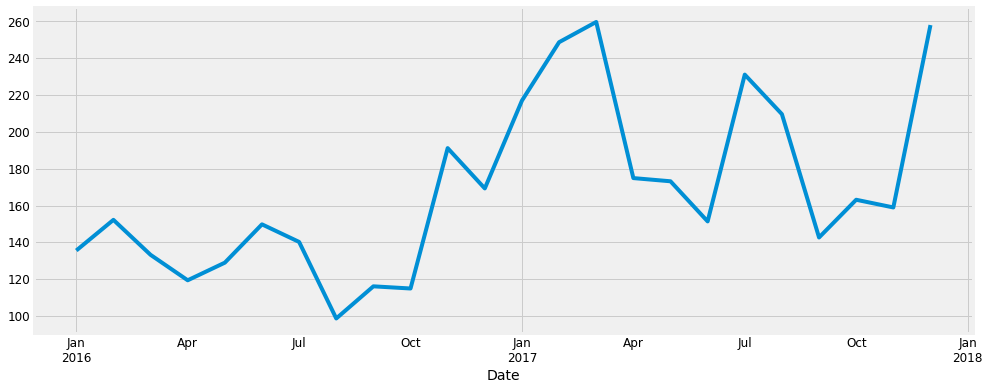

In [48]:
y.plot(figsize=(15, 6))
plt.show()

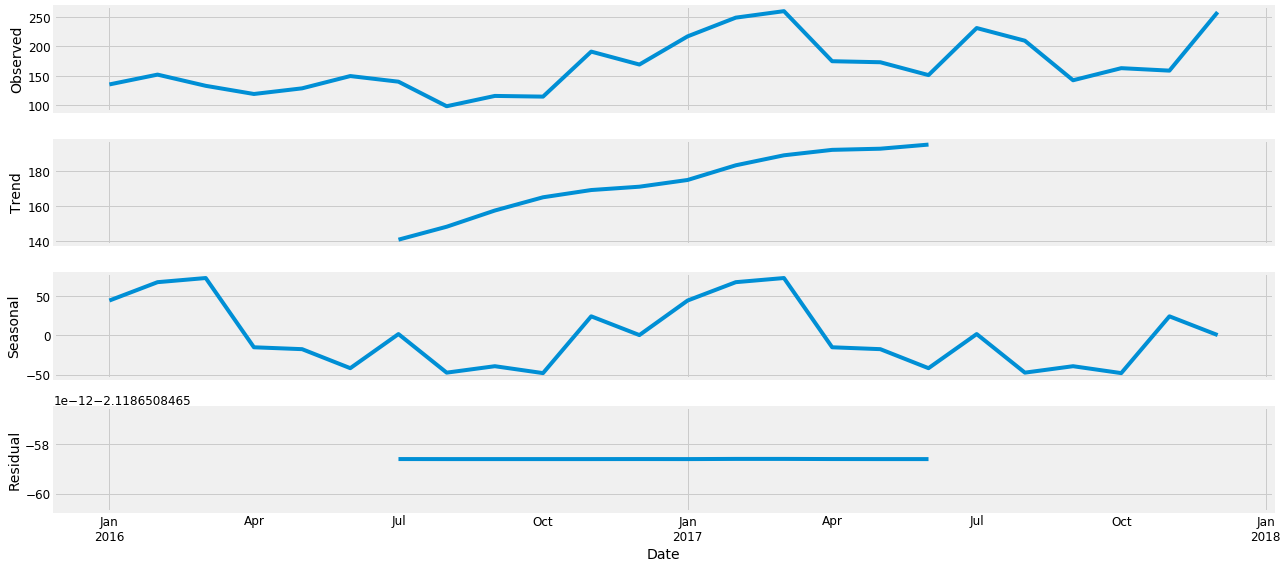

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [50]:
# Autoregressive Integrated Moving Average (ARIMA)
# ARIMA(p, d, q) = seasonality, trend, and noise in data

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [60]:
# parameter Selection

for param in pdq: 
    for param_seasonal in seasonal_pdq: 
        try:
            mod = sm.tsa.statespace.SARIMAX(y, 
                                            order = param, 
                                            seasonal_order=param_seasonal, 
                                            enforce_stationarity = False, 
                                            enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:305.0850945132743
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:128.38489724539102
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:131.88637316333225
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:274.5966919192498
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:116.12511307123873


C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:133.87952413452444
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:230.71214595201477
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:114.49490799949905
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:122.1360217942989
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:222.27425051193214
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:101.49386799661472
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:121.84324858702544
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:242.22975611055773
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:124.6574963692124
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:123.90612842107788
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:233.85602725518666
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:111.09319423975647
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:123.25901047421118
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:232.10620192849856
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:114.00492207405719
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:113.85535901972271
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:222.90341693464532
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:103.487081522

In [122]:
# 0, 1, 1 // 1, 0, 0, 12
# 1, 0, 0 // 0, 1, 0, 12 --
# 0, 0, 0 // 0, 1, 0, 12

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6435      0.297      2.169      0.030       0.062       1.225
sigma2      3398.1493   2026.752      1.677      0.094    -574.211    7370.509


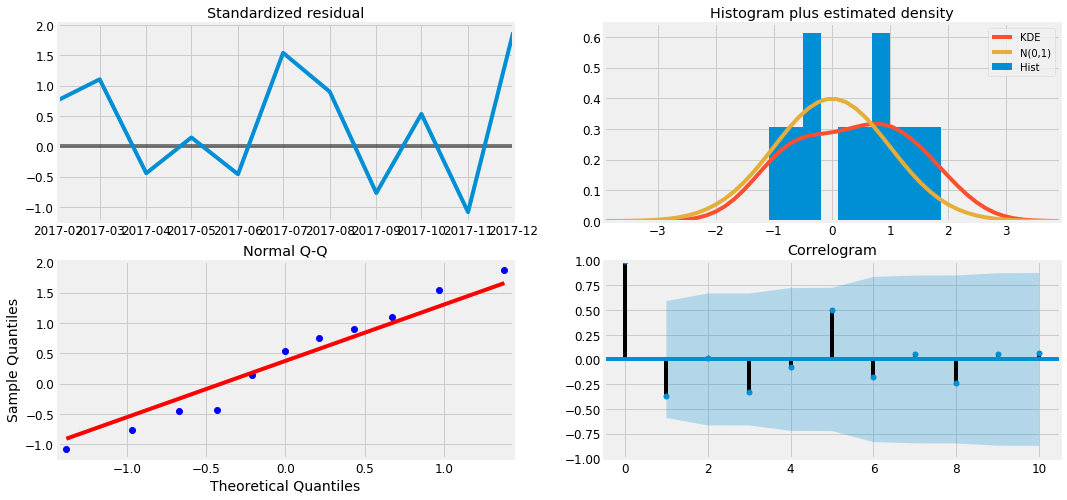

In [123]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

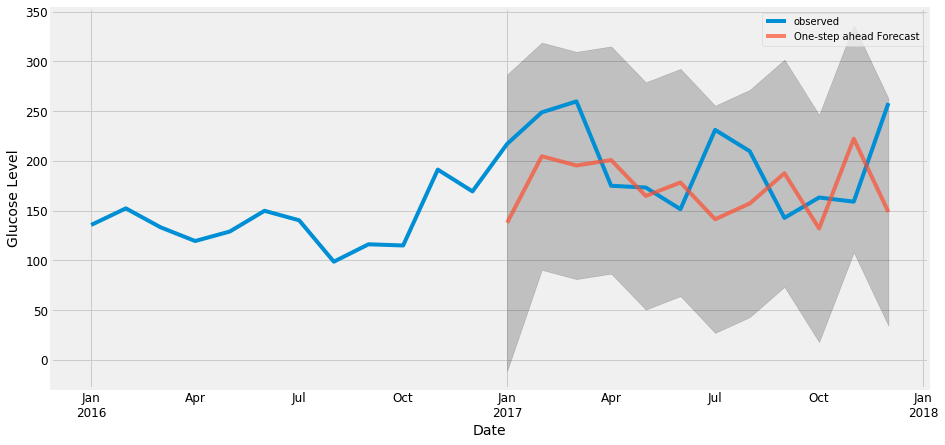

In [124]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Glucose Level')
plt.legend()
plt.show()

In [125]:
# Mean Squared Error (MSE) is an estimator to measures the average of the square of the errors.
# The smaller the MSE, the closer we are to finding the line of best fit.

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3638.05


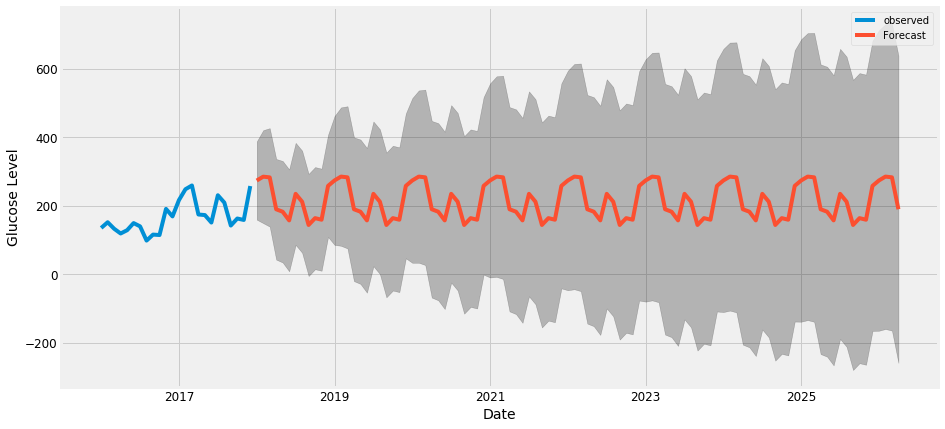

In [126]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Glucose Level')
plt.legend()
plt.show()